<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"> Lending Club Defaults Exploratory Analysis</h1>
<hr>

<span style="color:royalblue">Exploratory Analysis LendingClub Data Q1 2018</span>

<br><hr id="toc">

This workbook contains initial analysis of Lending Club data 



<br><hr>

### Import libraries and load the dataset.



In [1]:

from __future__ import print_function  

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns




various helper functions...

In [55]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
# This allows the machine learning algorithims to work on integers instead of strings
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]


To speed up initial analysis I will only import the firt 10000 lines for the dataset.
* The file path is <code style="color:crimson">'project_files/LoanStats_2018Q1.csv'</code>

In [69]:
# Load excerpt of load stats from CSV
df = pd.read_csv('LoanStats_2018Q1.csv', low_memory=False, nrows=30000)


This is the associated data dictionary describing the data features.

In [57]:
df_description = pd.read_excel('LCDataDictionary.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


the data itself...

In [32]:
display_all(df.head().T)

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3100,12000,35000,6025,10000
funded_amnt,3100,12000,35000,6025,10000
funded_amnt_inv,3100,12000,35000,6025,10000
term,36 months,36 months,36 months,36 months,36 months
int_rate,9.43%,6.07%,12.61%,9.43%,6.71%
installment,99.21,365.45,1172.73,192.81,307.45
grade,B,A,C,B,A
sub_grade,B1,A2,C1,B1,A3


<span id="basic"></span>
# 1. Basic information
Dimensions and datatypes

In [70]:
# Dataframe dimensions
df.shape

(30000, 145)

In [21]:
# Column datatypes
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                                 int64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

**Loan status Review **

* Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.
 
* A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments. Charge Off typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off.

* Fully Paid. Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.


In [71]:

df["loan_status"].value_counts()
#sns.countplot(y="loan_status", data=df)
#plt.show()


Current               27031
Fully Paid             1992
Late (31-120 days)      425
In Grace Period         311
Charged Off             147
Late (16-30 days)        93
Default                   1
Name: loan_status, dtype: int64

** Drop Unwanted Data
* The data set has 145 columns. We will drop all columns with 100% null values
* We also notice 6 columns with 99.97 null vale. From looking at the data dictionary these correspond to loans that have already been charged off and where a debt settlement company is involved. These columns will not add value to our analysis and can be dropped.

* A preliminary data analyis hows us that we can also drop the following columns:
id, member_id, emp_title, zip_code, addr_state, policy_code (publicly available product or not ),
next_pymnt_d (notrelevant at time of our analysis), url, subGrade, funded_amt, funded_amnt_inv


In [72]:
display_all(df.isnull().sum()/df.shape[0]*100)

id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       9.096667
emp_length                                      8.940000
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

In [73]:
df = df.drop(['zip_code', 'addr_state', 'url', 'desc', 'policy_code', 'last_pymnt_d', 'emp_title', 'next_pymnt_d'], axis=1)
df = df.drop(['sub_grade', 'funded_amnt', 'funded_amnt_inv', ], axis=1)
df = df.loc[:, df.isnull().sum() < 0.99*df.shape[0]]


In [86]:
df.shape
#display_all(df.head().T)

(30000, 112)

In [7]:
# Summarize categorical features
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,5000,5000,5000,5000,4569,4579,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,4992,5000,4994,4639,4999,5000,788,808,5000,5000,5000,1,1,1
unique,2,38,7,32,2936,11,4,3,1,6,1,13,12,734,50,469,972,2,6,3,8,2,3,306,1,2,2,1,1,1
top,36 months,10.90%,B,B4,Manager,10+ years,MORTGAGE,Source Verified,Mar-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Sep-2005,0%,w,Sep-2018,Oct-2018,Sep-2018,Individual,Not Verified,Dec-2002,N,Cash,N,Sep-2018,ACTIVE,Sep-2018
freq,3417,345,1515,345,106,1669,2386,2086,5000,4544,5000,2423,2423,59,646,51,73,4311,3389,4626,4299,4192,319,13,5000,4598,4999,1,1,1


**Using a loop, display <span style="color:royalblue">bar plots</span> for each of the categorical features.**

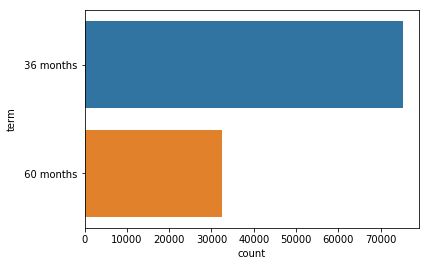

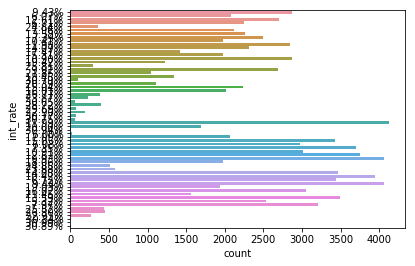

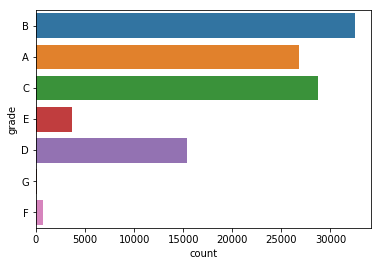

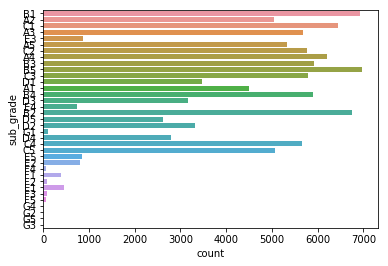

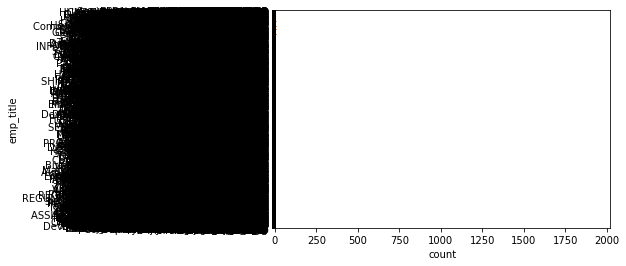

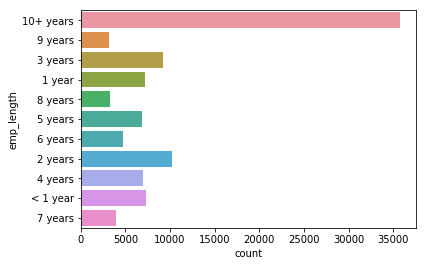

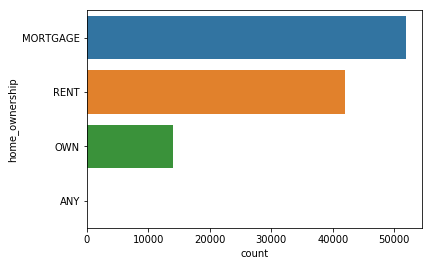

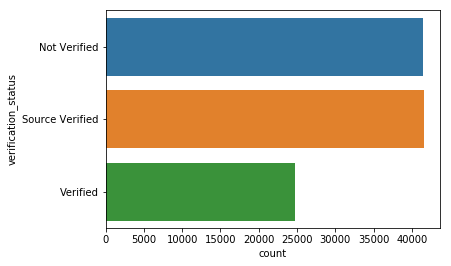

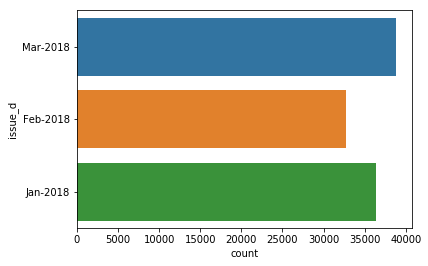

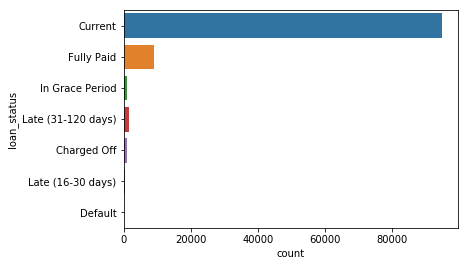

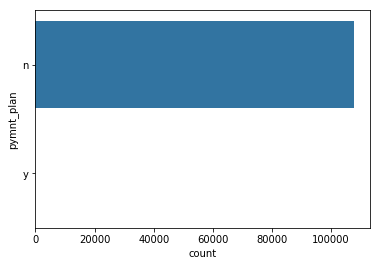

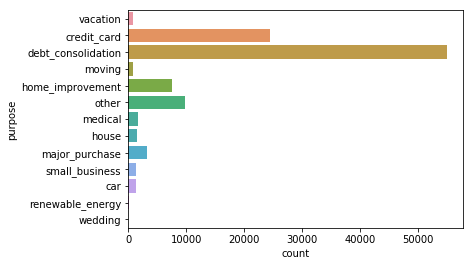

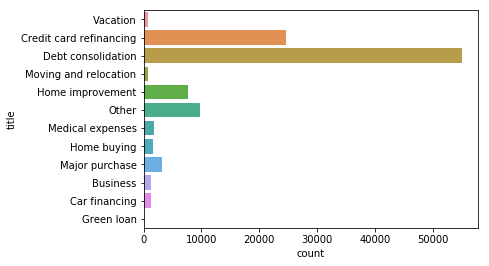

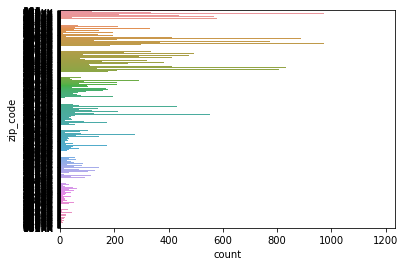

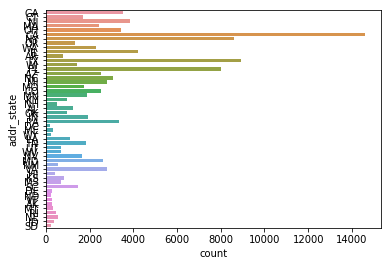

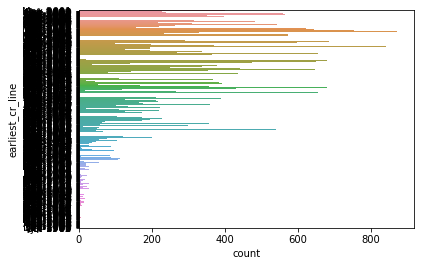

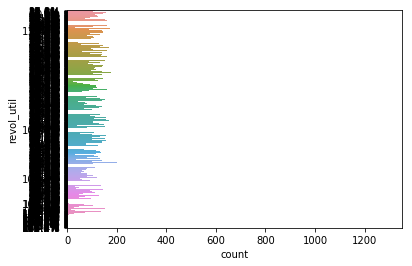

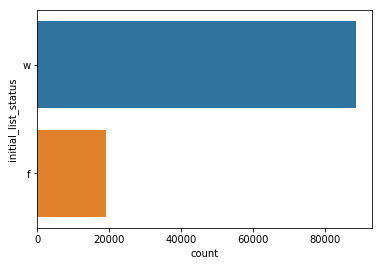

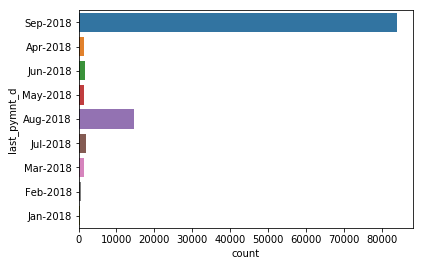

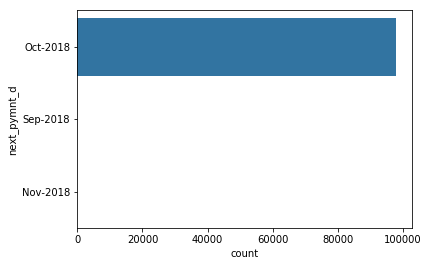

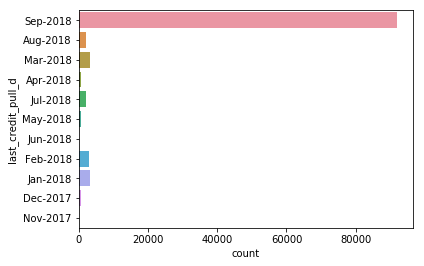

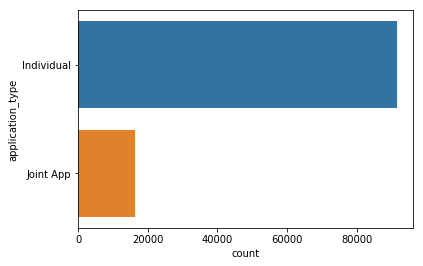

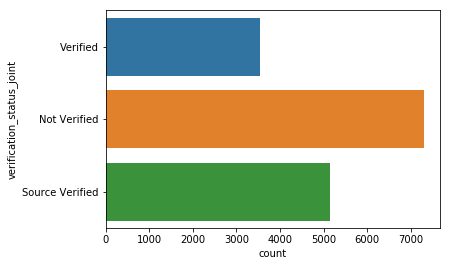

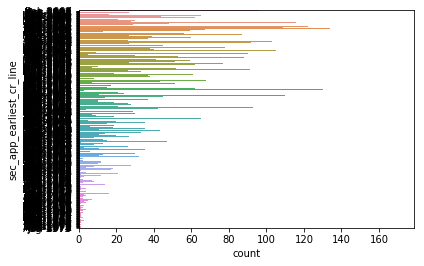

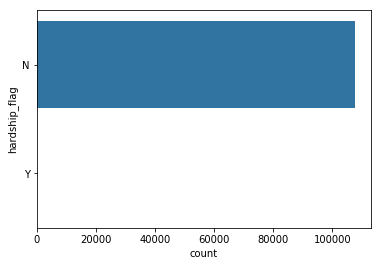

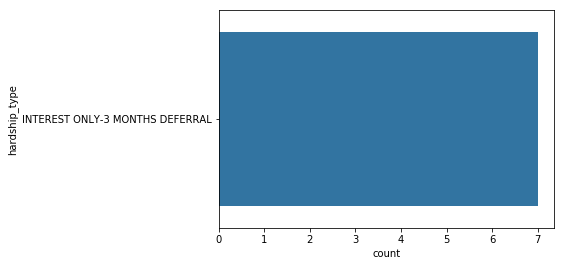

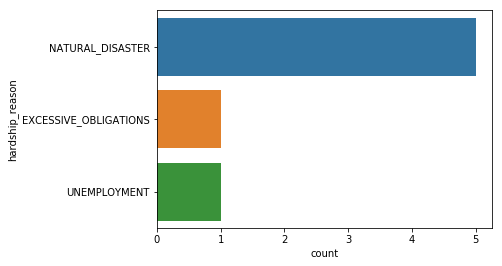

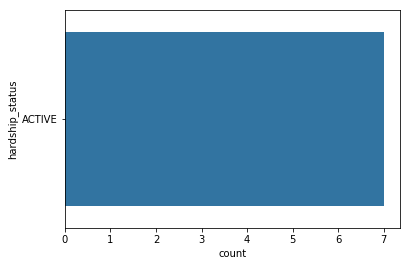

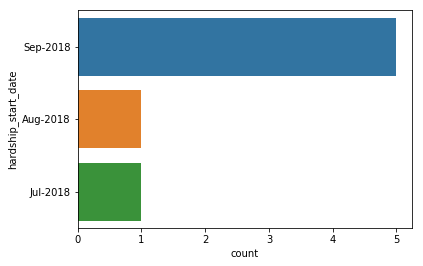

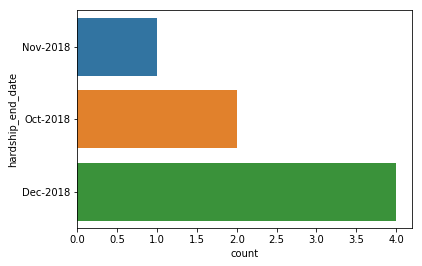

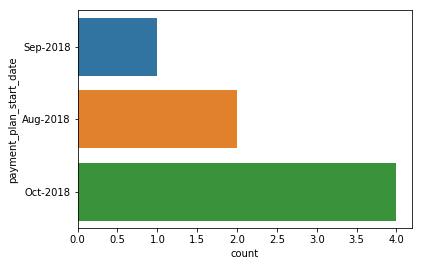

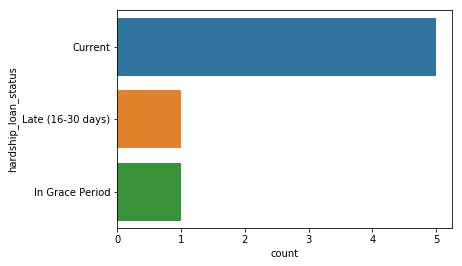

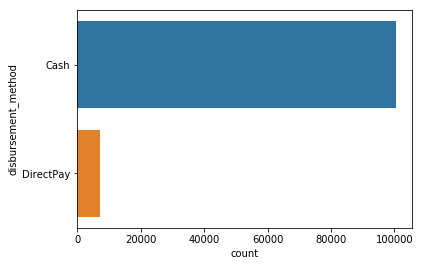

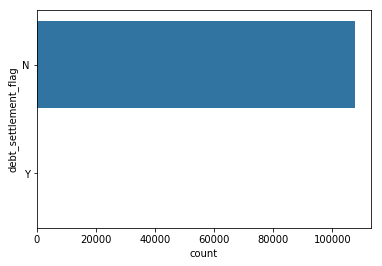

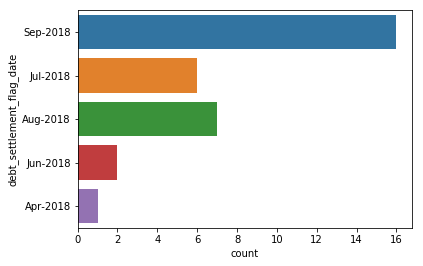

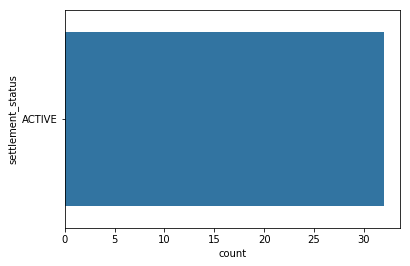

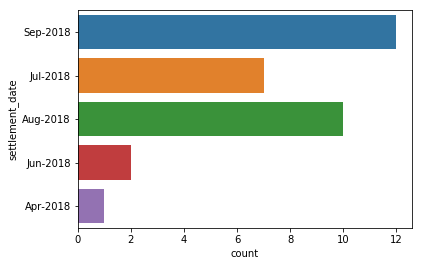

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

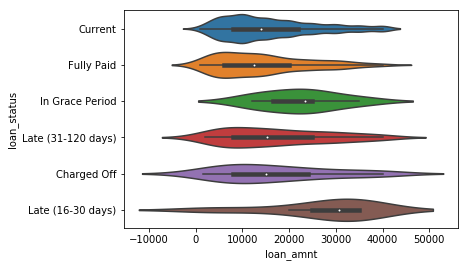

In [58]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='loan_status', x='loan_amnt', data=df)

In [8]:
# Segment by status and display the means within each class
df.groupby(by='loan_status').mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,...,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,NaN,NaN,17228.571429,17228.571429,17226.190476,509.174762,75619.047619,NaN,NaN,21.190952,0.333333,0.476190,27.461538,98.000000,10.952381,0.047619,23455.571429,18.619048,0.000000,0.000000,627.668095,627.491429,372.519524,254.434286,0.714286,0.0,0.0,385.226667,0.000000,46.000000,1.0,199371.428571,19.600000,0.0,0.000000,167157.809524,0.619048,2.380952,0.428571,1.047619,28.800000,28533.571429,78.187500,0.761905,2.571429,8380.857143,59.047619,47433.333333,0.476190,0.761905,...,20.900000,0.761905,3.666667,5.285714,4.619048,6.714286,4.809524,8.000000,12.523810,5.285714,10.952381,0.0,0.0,0.047619,1.190476,89.523810,34.480000,0.047619,0.000000,227802.095238,53587.476190,35504.761905,38613.238095,68517.714286,0.857143,1.285714,9.571429,62.257143,2.857143,9.714286,0.285714,0.285714,45.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6588.0,65.0,18.0
Current,NaN,NaN,15989.728213,15989.728213,15986.641725,460.922861,77148.552485,NaN,NaN,19.846973,0.225352,0.443222,36.505344,78.565008,11.403389,0.159331,15971.873460,22.531470,14357.445704,14354.733728,2426.928589,2426.422835,1632.282509,794.459888,0.186193,0.0,0.0,481.893836,0.015405,46.218075,1.0,121602.885191,19.652834,0.0,219.482174,141088.256602,0.919454,2.709947,0.664613,1.514305,21.391634,35165.766285,67.842759,1.269366,2.684639,5694.421875,53.690733,38337.557218,1.060519,1.484815,...,37.761229,0.454005,3.563160,5.214569,4.809639,7.104974,8.149208,8.081206,12.858715,5.184199,11.384683,0.0,0.0,0.057879,2.065801,94.733561,31.597401,0.118178,0.041153,182160.861356,51530.199824,26703.375000,45668.564921,32903.989101,0.682561,1.558583,11.286104,56.591678,3.010899,12.380109,0.070845,0.096730,33.983740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,NaN,NaN,14487.500000,14487.500000,14485.000000,424.623882,77800.132353,NaN,NaN,18.000029,0.235294,0.555882,33.346939,84.793103,11.311765,0.179412,14183.726471,24.047059,0.000000,0.000000,14929.230456,14926.654500,14487.500000,441.407206,0.323294,0.0,0.0,13173.444735,0.017647,43.833333,1.0,138456.761905,17.905714,0.0,164.908824,168524.229412,1.161765,2.458824,0.997059,2.000000,16.807927,37401.579412,73.847518,1.488235,3.038235,5653.850000,53.529412,36898.676471,1.641176,2.173529,...,35.84000

engineer a target_variable

In [19]:
pd.value_counts(df.loan_status).to_frame().reset_index()

,index,loan_status
0,Current,4544
1,Fully Paid,340
2,Late (31-120 days),82
3,Charged Off,21
4,Late (16-30 days),7
5,In Grace Period,6


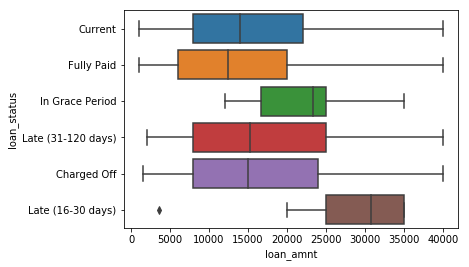

In [20]:
sns.boxplot(x="loan_amnt", y="loan_status", data=df)